<a href="https://colab.research.google.com/github/AadithS13/Data-Science/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df_user = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/Recommendation Engine/user_data.csv')

In [4]:
df_problem = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/Recommendation Engine/problem_data.csv')

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/Recommendation Engine/train_submissions.csv')

In [6]:
df_user.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [7]:
df_train.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [8]:
df_problem.head()

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [8]:
df_1 = pd.merge(df_user,df_train)

In [9]:
df = pd.merge(df_1,df_problem)

In [11]:
df.head(10)

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type,points,tags
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1,A,500.0,implementation
1,user_1972,107,99,0,India,11,1504291325,304.186,203.842,beginner,1439050893,prob_75,2,A,500.0,implementation
2,user_3317,735,715,0,Vietnam,9,1484278246,419.438,353.211,intermediate,1421847147,prob_75,2,A,500.0,implementation
3,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_75,1,A,500.0,implementation
4,user_872,113,95,0,Bangladesh,7,1504977695,314.220,89.163,beginner,1480081730,prob_75,1,A,500.0,implementation
5,user_3016,229,163,0,Syria,25,1502737539,307.339,200.688,beginner,1445031423,prob_75,1,A,500.0,implementation
6,user_3162,185,152,0,Bangladesh,12,1502781932,310.493,236.525,beginner,1441334312,prob_75,1,A,500.0,implementation
7,user_3272,127,98,0,Croatia,3,1503961714,311.927,289.278,beginner,1403541301,prob_75,1,A,500.0,implementation
8,user_258,96,84,0,Indonesia,3,1496638809,326.261,253.727,beginner,1460555438,prob_75,1,A,500.0,implementation
9,user_3109,94,90,0,Bangladesh,10,1505415336,308.486,163.704,beginner,1462643997,prob_75,2,A,500.0,implementation


In [37]:
df.shape

(155295, 16)

In [25]:
df.dtypes

user_id                       object
submission_count               int64
problem_solved                 int64
contribution                   int64
country                       object
follower_count                 int64
last_online_time_seconds       int64
max_rating                   float64
rating                       float64
rank                          object
registration_time_seconds      int64
problem_id                    object
attempts_range                 int64
level_type                    object
points                       float64
tags                          object
dtype: object

In [18]:
df.isnull().sum()

user_id                          0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
problem_id                       0
attempts_range                   0
level_type                     620
points                       29075
tags                         15427
dtype: int64

In [13]:
df['contribution'].unique()

array([  0,   1,  21,  -1,  -3,  -2,   3,  -7, -13,  29,  24,   2,   8,
        49,   9,   6,  36,  -4,  13,  20,  12,  53,  19,  15,  17,  32,
        -6,  47,   4,  -9,   7,  -5,   5,  85, -15,  28,  16, 119, -11,
       -26,  31,  22,  61,  27,  10,  62, 108, 116,  69, 111,  30,  25,
       -12, 171, -16, 126, 152, -10, 109,  77, -19, -28, -18,  54,  18,
        34,  35,  -8,  39,  11,  37,  23,  58,  56,  66,  40,  26, -24,
       134,  57,  87, 101, -38,  43,  94,  14, 110,  46,  50,  48, -44,
        68,  72, 103,  67, 121,  33, -17,  79, 124, 137, 157, -20, 133,
        38,  42,  52,  41, 115, -14, -27, -32,  90,  78,  74, -21, -64,
        55, 118,  51, 117, 102, 139, 122, -22,  71, 113, 105,  44, 123,
        45, 131,  83,  63,  92,  65,  88, 112])

In [10]:
country_mode = df['country'].mode()[0]
df['country'].fillna(country_mode,inplace=True)

In [11]:
df.isnull().sum()

user_id                          0
submission_count                 0
problem_solved                   0
contribution                     0
country                          0
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
problem_id                       0
attempts_range                   0
level_type                     620
points                       29075
tags                         15427
dtype: int64

In [12]:
df.level_type.unique()

array(['A', 'B', 'E', 'D', 'C', nan, 'F', 'G', 'I', 'H', 'K', 'J', 'L',
       'M', 'N'], dtype=object)

In [13]:
level_type_mode = df['level_type'].mode()[0]
df['level_type'].fillna(level_type_mode,inplace=True)

In [14]:
df['points'].mean()

993.3023688797338

In [15]:

df['points'].fillna(df['points'].mean(),inplace=True)

In [16]:
tags_mode = df['tags'].mode()[0]
df['tags'].fillna(tags_mode,inplace=True)

In [17]:
df.isnull().sum()

user_id                      0
submission_count             0
problem_solved               0
contribution                 0
country                      0
follower_count               0
last_online_time_seconds     0
max_rating                   0
rating                       0
rank                         0
registration_time_seconds    0
problem_id                   0
attempts_range               0
level_type                   0
points                       0
tags                         0
dtype: int64

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR) 

submission_count             3.620000e+02
problem_solved               3.290000e+02
contribution                 1.000000e+00
follower_count               4.500000e+01
last_online_time_seconds     1.441885e+06
max_rating                   1.450690e+02
rating                       1.576830e+02
registration_time_seconds    5.623385e+07
attempts_range               1.000000e+00
points                       5.000000e+02
dtype: float64


In [19]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
df1.shape

(73632, 16)

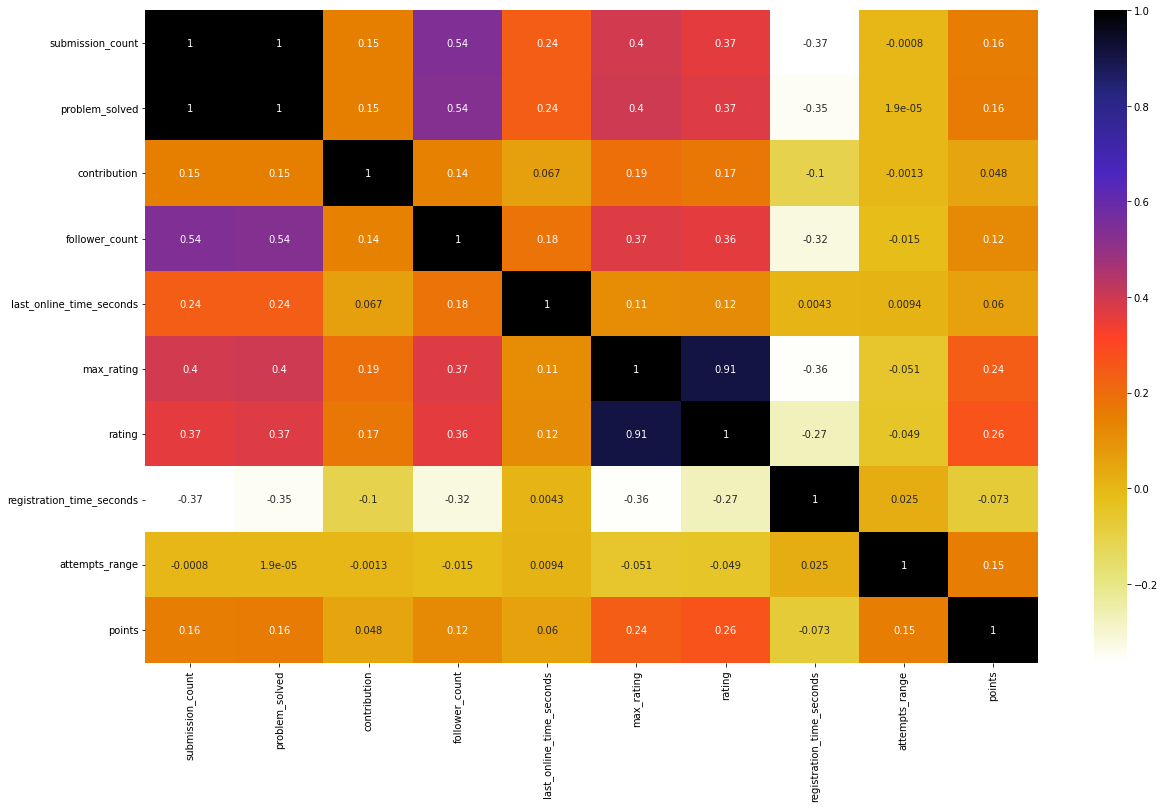

In [21]:
plt.figure(figsize=(20,12))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

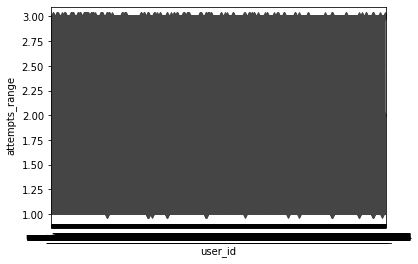

In [22]:
sns.boxplot(x=df1.user_id,y=df1.attempts_range)

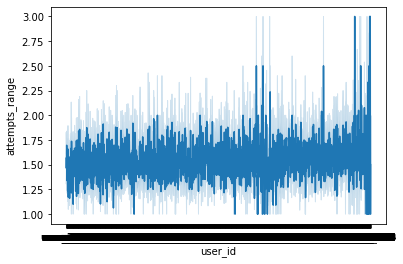

In [43]:
sns.lineplot(x=df1.user_id,y=df1.attempts_range)

In [23]:
df2 = df1.drop(['submission_count','contribution','last_online_time_seconds'],axis=1)

In [46]:
df.dtypes

user_id                       object
submission_count               int64
problem_solved                 int64
contribution                   int64
country                       object
follower_count                 int64
last_online_time_seconds       int64
max_rating                   float64
rating                       float64
rank                          object
registration_time_seconds      int64
problem_id                    object
attempts_range                 int64
level_type                    object
points                       float64
tags                          object
dtype: object

In [35]:
df_final = df2
label_encoder = preprocessing.LabelEncoder()
df3=['user_id','country','rank','problem_id','level_type','tags']
for column in df3:
  df_final[column]= label_encoder.fit_transform(df_final[column])
df_final.head(5)

,user_id,problem_solved,country,follower_count,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type,points,tags
0,1368,40,26,4,348.337,330.849,3,1466686436,3524,1,0,500.0,501
1,582,99,26,11,304.186,203.842,1,1439050893,3524,2,0,500.0,501
3,822,159,26,2,345.757,345.757,3,1429008478,3524,1,0,500.0,501
4,1805,95,5,7,314.220,89.163,1,1480081730,3524,1,0,500.0,501
5,1191,163,55,25,307.339,200.688,1,1445031423,3524,1,0,500.0,501


In [37]:
input = df_final.drop(['attempts_range','problem_solved','country','follower_count','max_rating','rating','rank','registration_time_seconds','level_type','points','tags'],axis=1)
target = df_final['attempts_range']

In [38]:
input.head()

,user_id,problem_id
0,1368,3524
1,582,3524
3,822,3524
4,1805,3524
5,1191,3524


In [40]:
input.shape

(73632, 2)

In [41]:
target.shape

(73632,)

In [42]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(input,target)

In [47]:
df_test = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/Recommendation Engine/test_submissions_NeDLEvX.csv')

In [44]:
df_test.head()

,ID,user_id,problem_id
0,user_856_prob_5822,user_856,prob_5822
1,user_2642_prob_2334,user_2642,prob_2334
2,user_2557_prob_2920,user_2557,prob_2920
3,user_1572_prob_4598,user_1572,prob_4598
4,user_295_prob_6139,user_295,prob_6139


In [48]:
df_test.isnull().sum()

ID            0
user_id       0
problem_id    0
dtype: int64

In [49]:

df4=['user_id','problem_id']
for column in df4:
  df_test[column]= label_encoder.fit_transform(df_test[column])
df_test.head(5)

,ID,user_id,problem_id
0,user_856_prob_5822,3347,3880
1,user_2642_prob_2334,1793,1085
2,user_2557_prob_2920,1699,1545
3,user_1572_prob_4598,627,2898
4,user_295_prob_6139,2125,4133


In [51]:
input_test = df_test.drop('ID',axis=1)
predicted = model.predict(input_test)

In [52]:
df3_final = pd.DataFrame()
df3_final['ID'] = df_test['ID']
df3_final['attempts_range'] = predicted.astype(int)
df3_final.to_csv('/content/drive/MyDrive/Analytics Vidhya/Recommendation Engine/Recommendation_Engine_Sample.xlsx', header='ID')